<a href="https://colab.research.google.com/github/KiranVarghese25/RL/blob/main/Lab1_RL_2348525.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

Streaming output truncated to the last 5000 lines.

Impression 6:
Exploiting: Selected arm 1 with estimated CTR 0.0000
Arm 1 not clicked
Updated arm 1: count = 1, new estimated CTR = 0.0000

Impression 7:
Exploiting: Selected arm 1 with estimated CTR 0.0000
Arm 1 not clicked
Updated arm 1: count = 2, new estimated CTR = 0.0000

Impression 8:
Exploiting: Selected arm 1 with estimated CTR 0.0000
Arm 1 not clicked
Updated arm 1: count = 3, new estimated CTR = 0.0000

Impression 9:
Exploring: Selected arm 2
Arm 2 not clicked
Updated arm 2: count = 2, new estimated CTR = 0.0000

Impression 10:
Exploiting: Selected arm 0 with estimated CTR 0.0000
Arm 0 clicked
Updated arm 0: count = 3, new estimated CTR = 0.3333

Impression 11:
Exploiting: Selected arm 0 with estimated CTR 0.3333
Arm 0 not clicked
Updated arm 0: count = 4, new estimated CTR = 0.2500

Impression 12:
Exploiting: Selected arm 0 with estimated CTR 0.2500
Arm 0 not clicked
Updated arm 0: count = 5, new estimated CTR = 0.2000

Imp

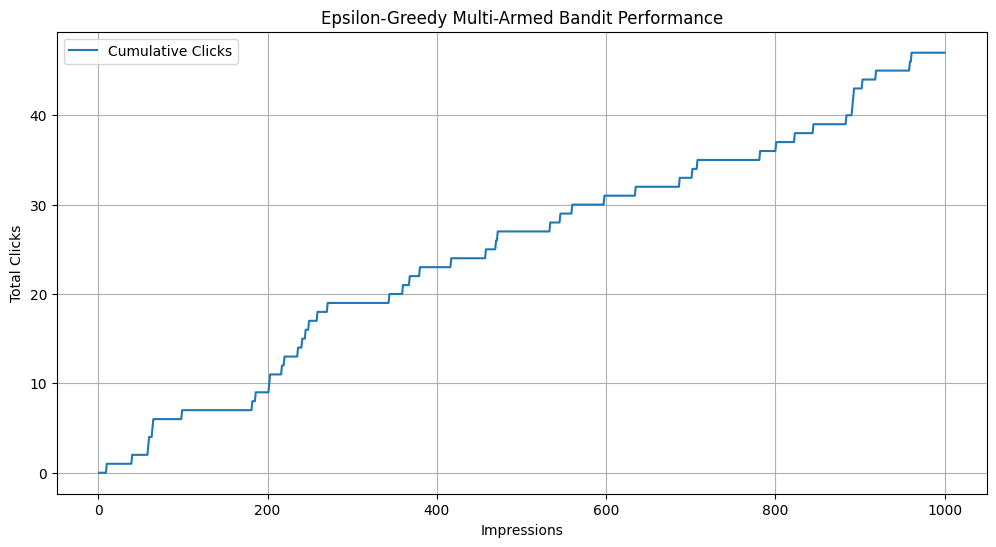

In [3]:


class EpsilonGreedyBandit:
    def __init__(self, n_arms, epsilon=0.1, true_ctrs=None):
        """
        Initialize the Epsilon-Greedy Bandit.

        :param n_arms: Number of ad slots (arms).
        :param epsilon: Probability of exploration.
        :param true_ctrs: Actual CTRs for each ad slot for simulation.
        """
        self.n_arms = n_arms
        self.epsilon = epsilon
        self.counts = [0] * n_arms
        self.values = [0.0] * n_arms
        self.true_ctrs = true_ctrs if true_ctrs else [0.0] * n_arms
        self.total_clicks = 0
        self.cumulative_clicks = []

    def select_arm(self):
        """
        Select an arm using the Epsilon-Greedy strategy.
        """
        if random.random() < self.epsilon:
            arm = random.randint(0, self.n_arms - 1)
            print(f"Exploring: Selected arm {arm}")
            return arm
        else:
            max_value = max(self.values)
            candidates = [i for i, v in enumerate(self.values) if v == max_value]
            arm = random.choice(candidates)
            print(f"Exploiting: Selected arm {arm} with estimated CTR {max_value:.4f}")
            return arm

    def update(self, arm, reward):
        """
        Update the estimated CTR for the selected arm.

        :param arm: The arm that was selected.
        :param reward: The observed reward (1 for click, 0 for no click).
        """
        self.counts[arm] += 1
        n = self.counts[arm]
        value = self.values[arm]
        new_value = ((n - 1) / n) * value + (1 / n) * reward
        self.values[arm] = new_value
        self.total_clicks += reward
        print(f"Updated arm {arm}: count = {n}, new estimated CTR = {new_value:.4f}")

    def run(self, n_rounds):
        """
        Run the simulation for a given number of rounds.

        :param n_rounds: Total number of ad impressions.
        """
        for i in range(1, n_rounds + 1):
            print(f"\nImpression {i}:")
            arm = self.select_arm()
            reward = 1 if random.random() < self.true_ctrs[arm] else 0
            print(f"Arm {arm} {'clicked' if reward == 1 else 'not clicked'}")
            self.update(arm, reward)
            self.cumulative_clicks.append(self.total_clicks)

    def results(self, ad_slot_names):
        """
        Print the results after the simulation.

        :param ad_slot_names: List of names for the ad slots.
        """
        print("\n=== Simulation Results ===")
        for i in range(self.n_arms):
            print(f"Ad Slot '{ad_slot_names[i]}':")
            print(f"  Selected: {self.counts[i]} times")
            print(f"  Clicks: {int(self.values[i] * self.counts[i])} clicks")
            print(f"  Estimated CTR: {self.values[i]:.4f}")
            print(f"  True CTR: {self.true_ctrs[i]:.4f}")
        print(f"\nTotal Clicks: {self.total_clicks}")
        best_arm = self.values.index(max(self.values))
        print(f"Best ad slot based on estimated CTR: '{ad_slot_names[best_arm]}'")

    def plot_results(self, ad_slot_names):
        """
        Plot the cumulative clicks over time.

        :param ad_slot_names: List of names for the ad slots.
        """
        plt.figure(figsize=(12, 6))
        plt.plot(range(1, len(self.cumulative_clicks) + 1), self.cumulative_clicks, label='Cumulative Clicks')
        plt.xlabel('Impressions')
        plt.ylabel('Total Clicks')
        plt.title('Epsilon-Greedy Multi-Armed Bandit Performance')
        plt.legend()
        plt.grid(True)
        plt.show()

def main():
    ad_slot_names = ['Top Banner', 'Sidebar', 'Footer', 'Pop-up']
    true_ctrs = [0.05, 0.07, 0.04, 0.02]
    bandit = EpsilonGreedyBandit(n_arms=4, epsilon=0.1, true_ctrs=true_ctrs)
    bandit.run(n_rounds=1000)
    bandit.results(ad_slot_names)
    bandit.plot_results(ad_slot_names)

if __name__ == "__main__":
    main()
